In [ ]:
import torch
import numpy as np
import pandas as pd
from config import Config
from models.multiple_input_net import MIN
from torch.utils.data import DataLoader
from utils.read_data import load_dataset
import cv2
import os
import torch.nn.functional as F
from utils.visualize import plot_tsne3, show_conclusion

In [ ]:
config = Config.Config()
config.device = 'cuda'
model_path = 'logs//best_trained_model'
model = MIN(config,['alexnet','alexnet']).to(config.device)
model.load_state_dict(torch.load(model_path,map_location=config.device))
sag_list = ['L3-L4','L4-L5','L5-S1']
train_data,test_data = load_dataset(config,sag_list,train_split = 2/3,from_trained = True) 
data = train_data
data.samples = test_data.samples + data.samples + data.unlabelled
data = DataLoader(data, batch_size=1, shuffle=True)

In [11]:
def evaluate(config,model,dev_iter,save_path = None,epoch = -1):
    model.eval()
    loss_fn = F.cross_entropy
    embeddings = torch.FloatTensor([]).to(config.device)
    targets = torch.IntTensor([]).to(config.device)
    with torch.no_grad():
        for sample_id,(tra,sag),y in dev_iter:
            x1 = [i.to(config.device) for i in sag.values()]
            x2 = tra.to(config.device)
            y = y.to(config.device)
            outputs = model(x1,x2)
            loss = torch.FloatTensor([0.1])
            embeddings = torch.cat([embeddings,model.hidden_state])
            targets = torch.cat([targets,torch.unsqueeze(y,dim = 1)])
    plot_tsne3(embeddings.cpu().detach().numpy(),targets.cpu().detach().numpy(),config.embbeding_save_path,name1='total')
    return None

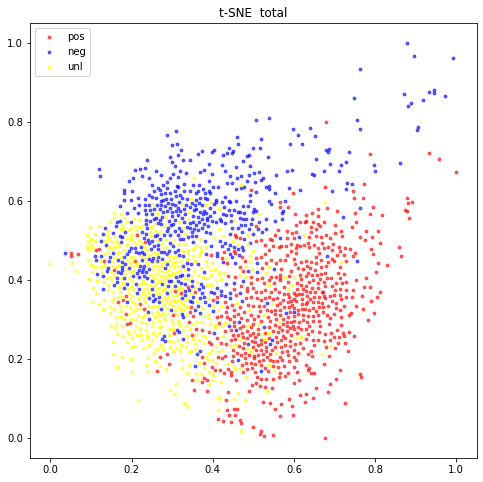

In [12]:
evaluate(config,model,data,save_path = 'tmp_save')